In [13]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

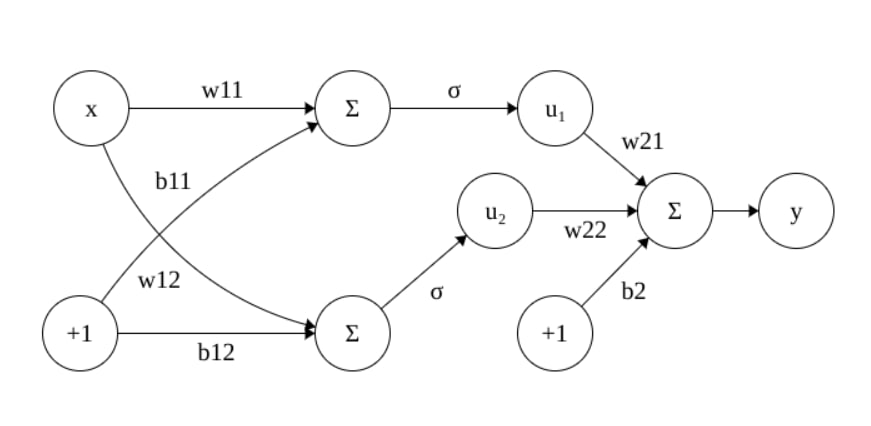

В этой нейронной сети будет 7 обучаемых параметров: $w_{11}, w_{12}, w_{21}, w_{22}, b_{11}, b_{12}, b_2$

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{1}{n}(-2Y_i+2\widehat{y}(X_i))$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{-exp(-x)}{(1+exp(-x))^2} = \frac{1}{1+exp(-x)} - \frac{1}{(1+exp(-x))^2} = \sigma(x) - \sigma^2(x)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial\sigma(w_{1h}X_i+b_{1h})}{\partial w_{1h}w_{1h}} = (-\sigma(w_{1h}X_i+b_{1h})^2+\sigma(w_{1h}X_i+b_{1h}))\cdot X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{\partial\sigma(w_{1h}X_i+b_{1h})}{\partial b_{1h}} = -\sigma(w_{1h}X_i+b_{1h})^2+\sigma(w_{1h}X_i+b_{1h})$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

При большом количестве данных воспользуемся Стохастическим градиентным спуском: разобьем данные на батчи, посчитаем градиент для каждого батча и обновим параметры.

Разница в виде формулы между обычным градиентным спуском и стохастическим (где $\theta$ -- все параметры сети):

*GD:* $\quad \theta_t = \theta_{t-1} - \eta \nabla(\frac{1}{n}\sum\limits_{i=1}^n MSE(\widehat{y}_{\theta_{t-1}}(X_i), Y_i))$

*SGD:* $\quad \theta_t = \theta_{t-1} - \eta \nabla(\frac{1}{B}\sum\limits_{b=1}^B MSE(\widehat{y}_{\theta_{t-1}}(X_{i_b}), Y_{i_b}))$

**Вывод:**

Мы смогли получить формулы для градиентного спуска методом обратного распространения ошибки

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [3]:
from IPython.display import clear_output

import torch
from torch import nn

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

В качестве нелинейной функции возьмем $y=x^2$

In [54]:
from sklearn.model_selection import train_test_split

sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = X**2
X_train, X_test = train_test_split(X, test_size=0.2)
y_train = X_train ** 2
y_test = X_test ** 2

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

assert y.shape == (sample_size, 1)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [55]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

In [56]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.xlabel('X')
    plt.title('приближение Y(X)=X^2 с помощью градиентного спуска')
    plt.legend(['y=X^2', 'приближение'])
    plt.show()

    print(f"MSE = {loss:.3f}")

Обучим нашу модель

In [57]:
# Количество итераций
num_iter = 100000

x_train_new = X_train_tensor.reshape(-1, 1)
y_train_new = y_train_tensor.reshape(-1, 1)

x_test_new = X_test_tensor.reshape(-1, 1)
y_test_new = y_test_tensor.reshape(-1, 1)

# для обработки на GPU 
x_train_new = x_train_new.cuda()
y_train_new= y_train_new.cuda()
x_test_new = x_test_new.cuda()
y_test_new= y_test_new.cuda()
model = model.cuda()

loss_values = []

for i in tqdm(range(num_iter)):

    # Forward pass: предсказание модели по данным x_train_new
    y_pred = model(x_train_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_train_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    loss_values.append(loss.item())

  0%|          | 0/100000 [00:00<?, ?it/s]

Получим предсказание на тестовой выборке и построим график итогового приближения

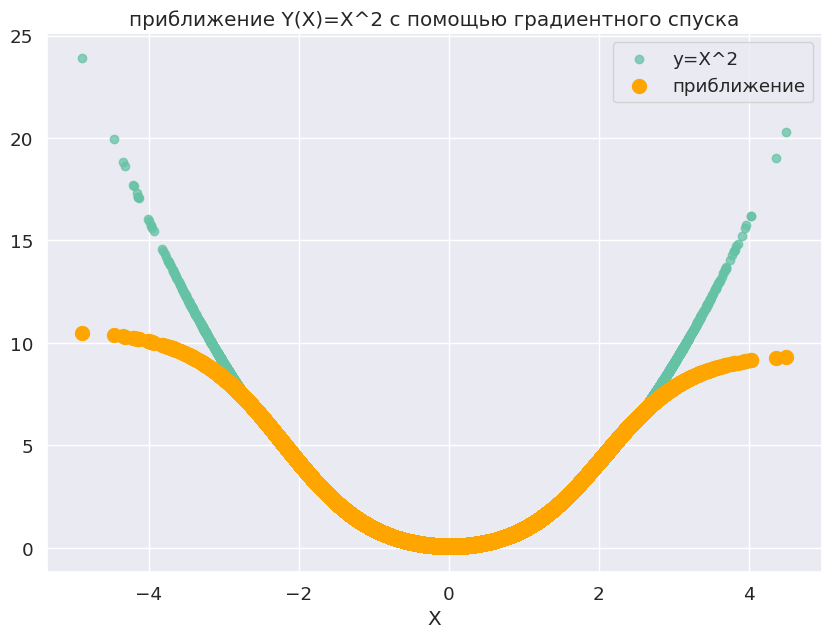

MSE = 0.026


In [58]:
# График
y_test_pred = model(x_test_new)
show_progress(X_test_tensor, y_test_tensor, y_test_pred.cpu(), loss)

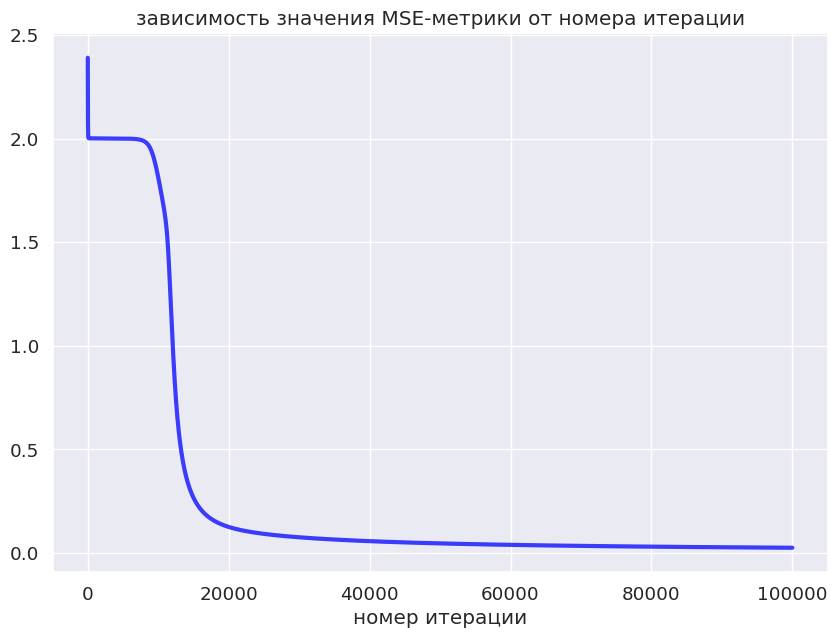

In [62]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(num_iter), loss_values, color='blue', linewidth=3, alpha=0.75)
plt.xlabel('номер итерации')
plt.title('зависимость значения MSE-метрики от номера итерации')
plt.show()

**Вывод:**

Нам удалось приблизить функцию с достаточно хорошей точностью. Ясно, что чем больше итераций мы делаем, тем меньше получается значение метрики (MSE). Однако точность эта достигается на небольшом отрезке, при больших X предсказание начинает отходить от исходных данных. Можем предположить, что эта проблема решается добавлением новых нейронов в сеть.

Однако стоит заметить, что на поздних итерациях изменение метрики незначительно (см. график выше), поэтому нет особого смысла проводить все итерации. Будет достаточно "обрубить" цикл, когда удовлетворительное значение метрики будет достигнуто.

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [63]:
class SigmoidNeuralNetwork():
    def __init__(self, lr_w, lr_b, batch_size=0):
        '''
        Инициализация сети.
        
        Аргументы: 
        lr_w -- learning rate для параметров w1, w2
        lr-w -- learning rate для параметров b1, b2
        batch_size -- размер батча
        '''
        self.batch_size = batch_size
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.w1 = np.random.rand(1, 2)
        self.b1 = np.random.rand(1, 2)
        self.w2 = np.random.rand(1, 2)
        self.b2 = np.random.rand(1, 1)
        
    def act_func(self, X):
        # функция активации в нашей сети
        return 1 / (1 + np.exp(-X))
        
    def fit(self, X_inf, Y_inf, number_of_iterations=5000):
        '''
        Обучение сети.
        
        Аргументы:
        X_inf -- матрица признаков
        Y_inf -- матрица целевого признака 
        number_of_iterations -- количество итераций в обучении
        '''
        n, d = Y_inf.shape
        if self.batch_size == 0:
            self.batch_size = n
        for i in tqdm(range(number_of_iterations)):
            indexes = np.random.permutation(len(X_inf)) # перемешиваем элементы
            X = X_inf[indexes]
            Y = Y_inf[indexes]
            number_of_batches = len(X_inf) // self.batch_size + int(len(X_inf) % self.batch_size != 0) # округляем вверх
            list_of_batches = []
            for j in range(number_of_batches): # формируем батчи
                ind_begin, ind_end = j * self.batch_size, (j+1)*self.batch_size
                list_of_batches.append((X[ind_begin : ind_end], Y[ind_begin : ind_end]))

            for (x, y) in list_of_batches:
                # Forward pass
                layer_1 = x @ self.w1 + self.b1
                layer_2 = self.act_func(layer_1)
                layer_3 = layer_2 @ self.w2.T + self.b2
                layer_3 = layer_3.reshape(-1, 1)

                # Подсчет градиентов (Backward pass)
                dlayer_3 = 2 * (layer_3 - y) / y.shape[0]
                dw2 = np.sum(layer_2.T @ dlayer_3)
                db2 = np.sum(dlayer_3, axis=0)

                dlayer_2 = dlayer_3 @ self.w2
                dact_func = layer_2 * (1 - layer_2)
                dlayer_1 = dlayer_2 * dact_func
                dw1 = x.T @ dlayer_1
                db1 = np.sum(dlayer_1, axis=0)

                # Обновление параметров
                self.w2 -= self.lr_w * dw2
                self.b2 -= self.lr_b * db2
                self.w1 -= self.lr_w * dw1
                self.b1 -= self.lr_b * db1
        return self
    
    
    def predict(self, X):
        '''
        Предсказание сети.
        
        Аргументы:
        X -- матрица признаков
        
        Возвращает:
        predictions -- предсказания нашей сети
        '''
        layer_1 = X @ self.w1 + self.b1
        layer_2 = self.act_func(layer_1)
        layer_3 = layer_2 @ self.w2.T + self.b2
        predictions = layer_3.reshape(-1, 1)
        
        return predictions

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [64]:
def optim_function(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

In [65]:
SigmoidNN = SigmoidNeuralNetwork(lr_w=0.1, lr_b=0.1, batch_size=512)
SigmoidNN.fit(X_train, y_train, number_of_iterations=100)
sigmoidnn_pred = SigmoidNN.predict(X_test)

  0%|          | 0/100 [00:00<?, ?it/s]

Обучим простую линейную регрессию

In [66]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

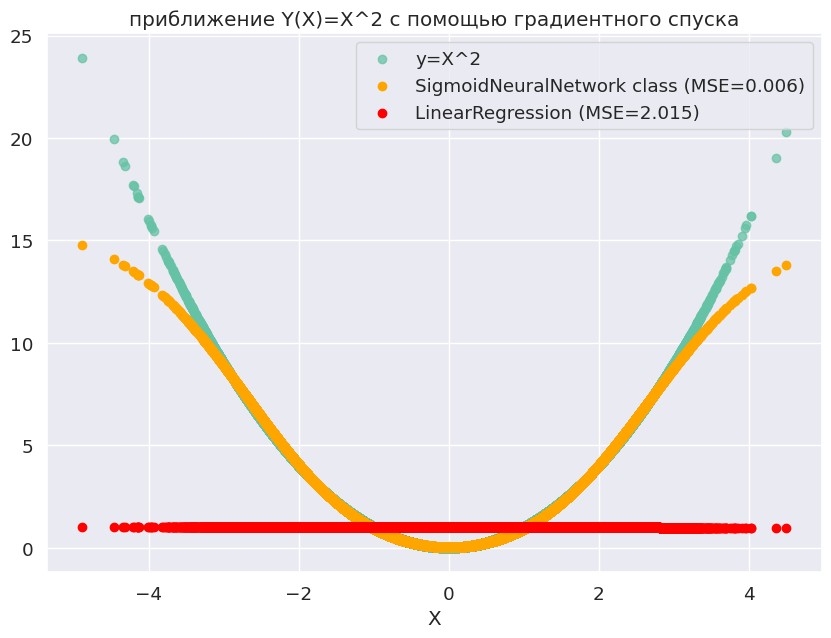

In [67]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, alpha=0.75)
plt.scatter(X_test, sigmoidnn_pred, color='orange', linewidth=1)
plt.scatter(X_test, linear_preds, color='red', linewidth=1)
plt.xlabel('X')
plt.title('приближение Y(X)=X^2 с помощью градиентного спуска')
plt.legend(['y=X^2', f'SigmoidNeuralNetwork class (MSE={optim_function(sigmoidnn_pred, y_test):.3f})', f'LinearRegression (MSE={optim_function(linear_preds, y_test):.3f})'])
plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

Зададим функцию $y = 5cos(x^3)+7$ и обучим нашу нейронную сеть

In [38]:
cos_sample_size = int(1e6)
X_cos = sps.norm.rvs(size=(cos_sample_size, 1))
y_cos = 5 * np.cos(X_cos**3) + 7
X_train, X_test = train_test_split(X_cos, test_size=0.2)
y_train = 5 * np.cos(X_train**3) + 7
y_test = 5 * np.cos(X_test**3) + 7

cos_SigmoidNN = SigmoidNeuralNetwork(lr_w=0.1, lr_b=0.1, batch_size=512)
cos_SigmoidNN.fit(X_train, y_train, number_of_iterations=100)
cos_sigmoidnn_pred = cos_SigmoidNN.predict(X_test)

  0%|          | 0/100 [00:00<?, ?it/s]

Обучим модель линейной регрессии

In [39]:
cos_linear_model = LinearRegression(fit_intercept=True)
cos_linear_model.fit(X_train, y_train)
cos_linear_preds = cos_linear_model.predict(X_test)

Обучим модель из Pytorch

In [40]:
X_tensor = torch.FloatTensor(X_cos)
y_tensor = torch.FloatTensor(y_cos)

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

x_new = X_tensor.reshape(-1, 1)
y_new = y_tensor.reshape(-1, 1)

# для обработки на GPU 
x_new = x_new.cuda()
y_new= y_new.cuda()
model = model.cuda()

In [41]:
# Количество итераций
num_iter = 10000

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

x_train_new = X_train_tensor.reshape(-1, 1)
y_train_new = y_train_tensor.reshape(-1, 1)

x_test_new = X_test_tensor.reshape(-1, 1)
y_test_new = y_test_tensor.reshape(-1, 1)

# для обработки на GPU 
x_train_new = x_train_new.cuda()
y_train_new= y_train_new.cuda()
x_test_new = x_test_new.cuda()
y_test_new= y_test_new.cuda()
model = model.cuda()

loss_values = []

for i in tqdm(range(num_iter)):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    loss_values.append(loss.item())

  0%|          | 0/10000 [00:00<?, ?it/s]

Выведем результаты на общий график

/home/vadim/DS-env/lib64/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


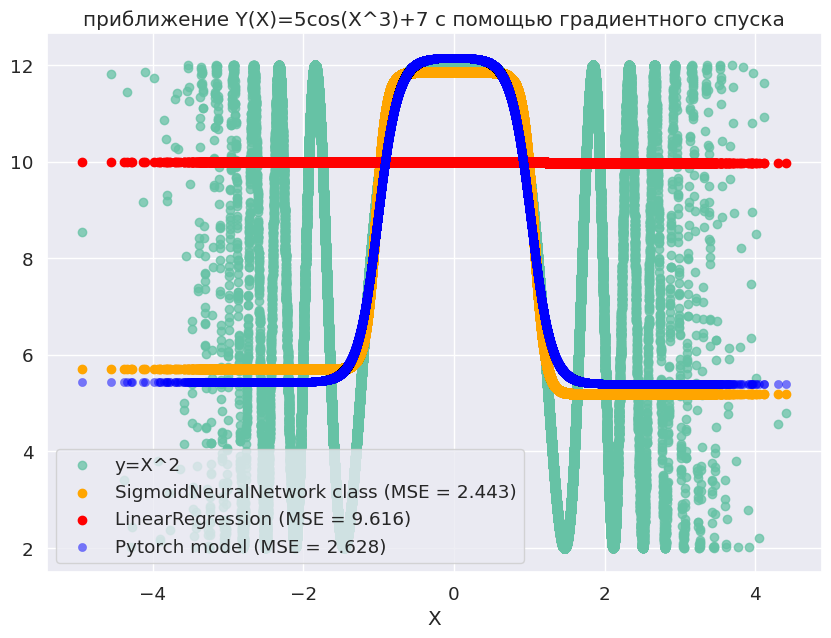

In [42]:
# График
y_test_pred = model(x_test_new)
y_test_pred = y_test_pred.cpu().detach()
loss = loss.item()

plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, alpha=0.75)
plt.scatter(X_test, cos_sigmoidnn_pred, color='orange', linewidth=1)
plt.scatter(X_test, cos_linear_preds, color='red', linewidth=1)
plt.scatter(X_test, y_test_pred, color='blue', linewidth=0.25, alpha=0.5)
plt.xlabel('X')
plt.title('приближение Y(X)=5cos(X^3)+7 с помощью градиентного спуска')
plt.legend(['y=X^2', f'SigmoidNeuralNetwork class (MSE = {optim_function(cos_sigmoidnn_pred, y_test):.3f})', f'LinearRegression (MSE = {optim_function(cos_linear_preds, y_test):.3f})', f'Pytorch model (MSE = {loss:.3f})'])
plt.show()

**Вывод:**
с помощью класса у нас получился результат, сопоставимый по точности с результатом нашей модели. На обеих нелинейных функциях мы наблюдаем расхождения предсказаний с исходными данными, решить это можно скорее всего с помощью добавления нейронов, увеличения количества итераций и, может быть, изменением функции активации на другую.

Обычная линейная регрессия из sklearn в обоих случаях не слишком подошла, так как мы передали ей только линейные признаки, поэтому она будет хорошо справляться только с линейными функциями, а в нашем случае функции соответственно не линейны. 